# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Understanding of the data 

The aim of the data provided is to construct the Machine learning model that helps predict the factor consituting the price of the used cars. 

In [1]:
#panda
import pandas as pd
import numpy as np

# statmodel columns transformer / preprocessing 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from sklearn import set_config
set_config(display='diagram')

from sklearn.impute import SimpleImputer

import missingno as msno # to visualize the missing value

#plotting library 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#model validation / selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#Calculating Loss Function MSE, Absolute Loss, Huber Loss
from sklearn.metrics import mean_squared_error, mean_absolute_error

#other OS
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
# lets load the data using pandas. 
auto = pd.read_csv('/Users/mma0812/Downloads/practical_application_II_starter/data/vehicles.csv')


In [3]:
auto.describe()

# the data has varying means, std, mix and max. It won't be possible to model the data based on such distribution. 

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [4]:
# Features consists of integer, object and float. 
# More on this in the subsequent sections but it seems we will have to fix the distribution later. 
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
# calculate missing values. We will dive-deeper into the null values in the subsequent sections. 
auto.isnull().sum(axis = 0)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
auto.tail()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [7]:
# Let's make the copy of the dataframe for further processing. 

auto_copy = auto.copy()

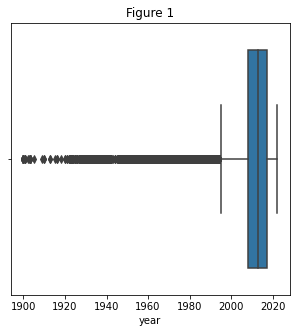

In [8]:
# outliers in year features using the boxplot. 
#(inspired from one of the online article - boxplot were suggested to identify the outliers.)

fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.boxplot(x=auto_copy['year'])
axs.set_title('Figure 1')

plt.show()

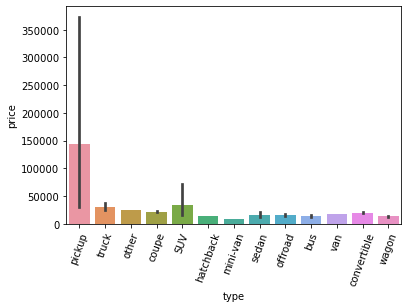

In [9]:
#distribution of price based on the type of car. 
sns.barplot(x='type',y='price',data=auto_copy)
plt.xticks(rotation=70)
plt.show()

# Looks pickup are the most pricer. 

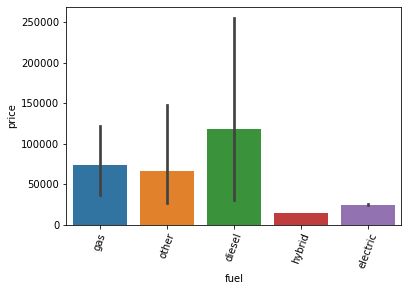

In [10]:
sns.barplot(x='fuel',y='price', data=auto_copy)
plt.xticks(rotation=70)
plt.show()

# no doubt, diesel cars are costlier. others might be the empty rows, we will fix it later. 

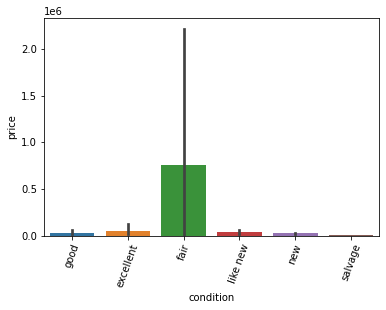

In [11]:
# barplot of the condition of cars and its price distribution. 
sns.barplot(x='condition',y='price', data=auto_copy)
plt.xticks(rotation=70)
plt.show()

# no doubt, the used cars with the fair condition would cost more. 
# To my surprise, why good and excellent condition aren't costly? 
#Maybe there are combinations of features impacting the price of excellent and good. 

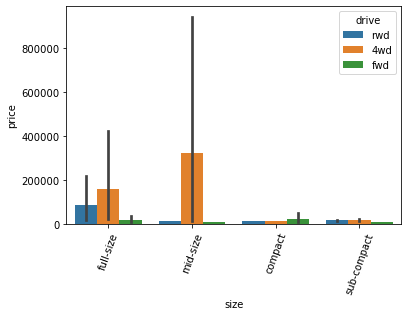

In [12]:
sns.barplot(x='size',y='price', hue='drive', data=auto_copy)
plt.xticks(rotation=70)
plt.show()

# Mid-size cars with the forward drive are costly. Of course, that's most sold cars. 

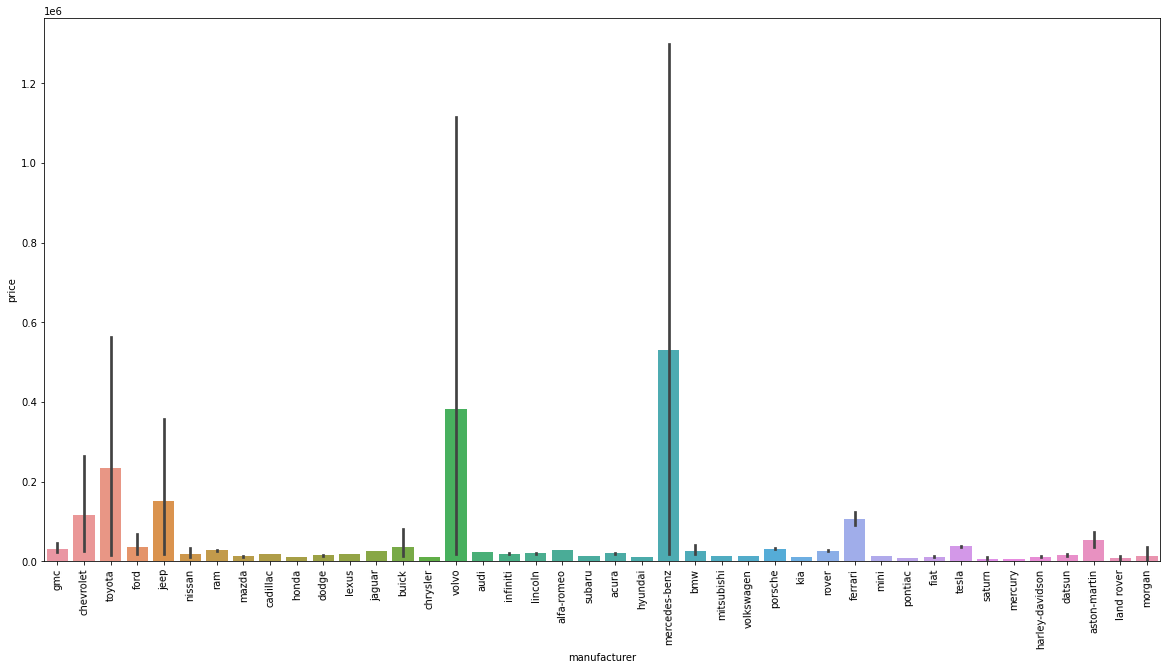

In [13]:
# barplot of manufacturer and price. 

fig,axs=plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(x='manufacturer',y='price',data=auto)
plt.xticks(rotation=91)
plt.show()

#no doubt, luxury cars (mercedez-benz and volvo) are costlier. 

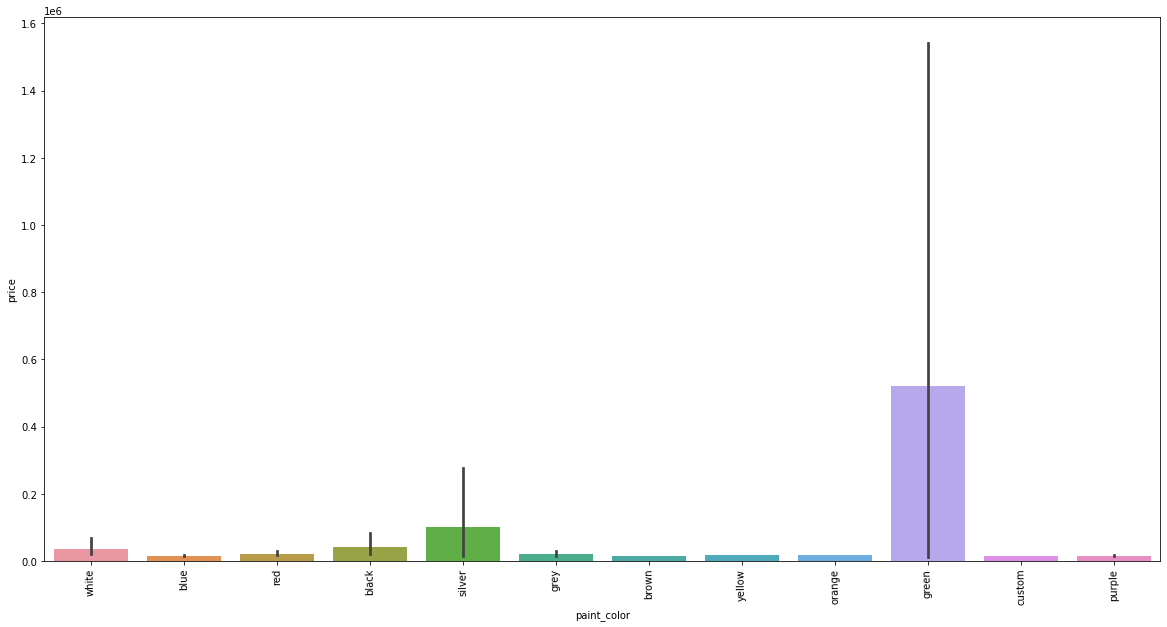

In [14]:
# barplot to see the distribution of colors and price. 
fig,axs=plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(x='paint_color',y='price', data=auto)
plt.xticks(rotation=91)
plt.show()

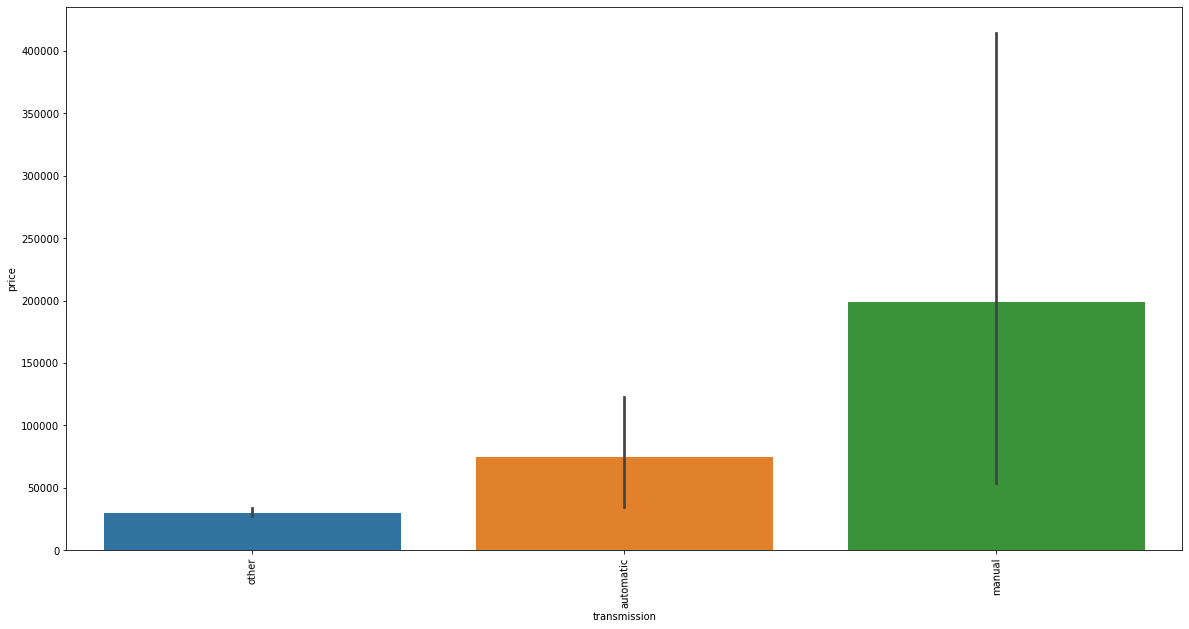

In [15]:
# Plotting bar graph to see the distribution of transmission 

fig,axs=plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(x='transmission',y='price', data=auto)
plt.xticks(rotation=91)
plt.show()

#manual cars are pricer than automatic and others. I'm assuming others is Hybrid. 

<AxesSubplot:title={'center':'Distribution of Manufacturer'}>

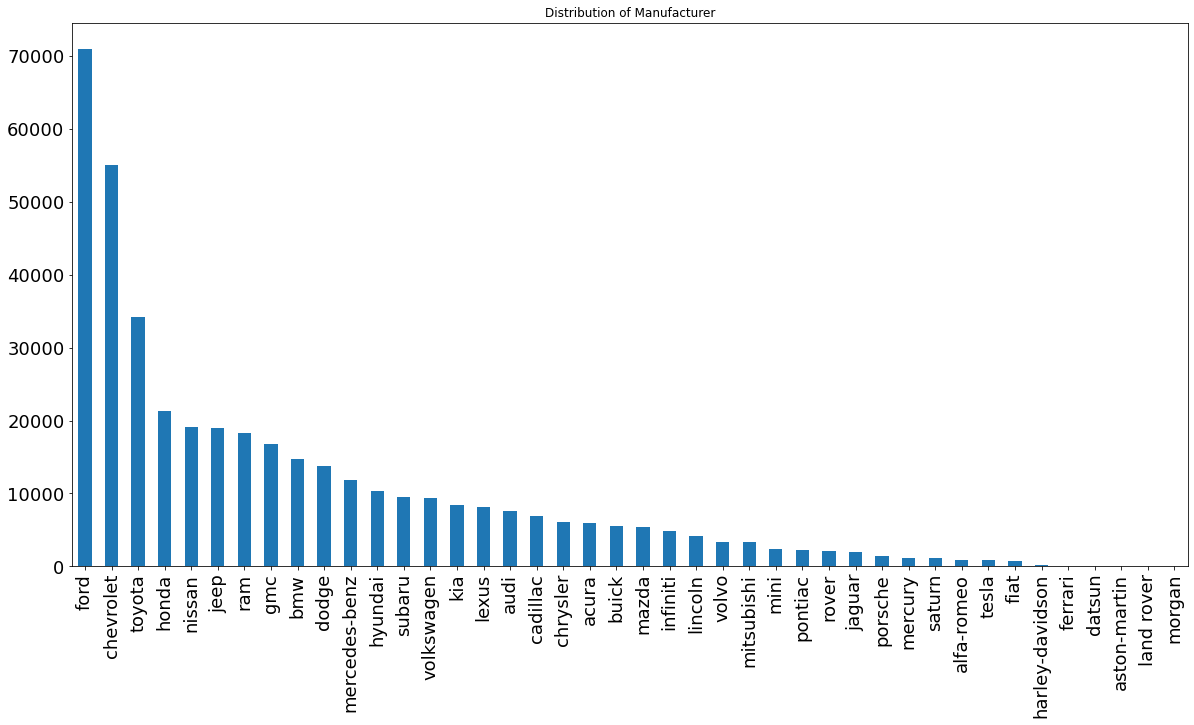

In [16]:
# Plotting the distribution of manufacturer of cars.  
auto_copy['manufacturer'].value_counts().plot(kind='bar', figsize=(20,10), 
                                              fontsize=18, title='Distribution of Manufacturer')

# It seems ford, chevrolet, and toyota occured frequently. 
#It makes sense if we think, these brands are affordable and frequently bought. 

<AxesSubplot:title={'center':'Distribution of Type of cars'}>

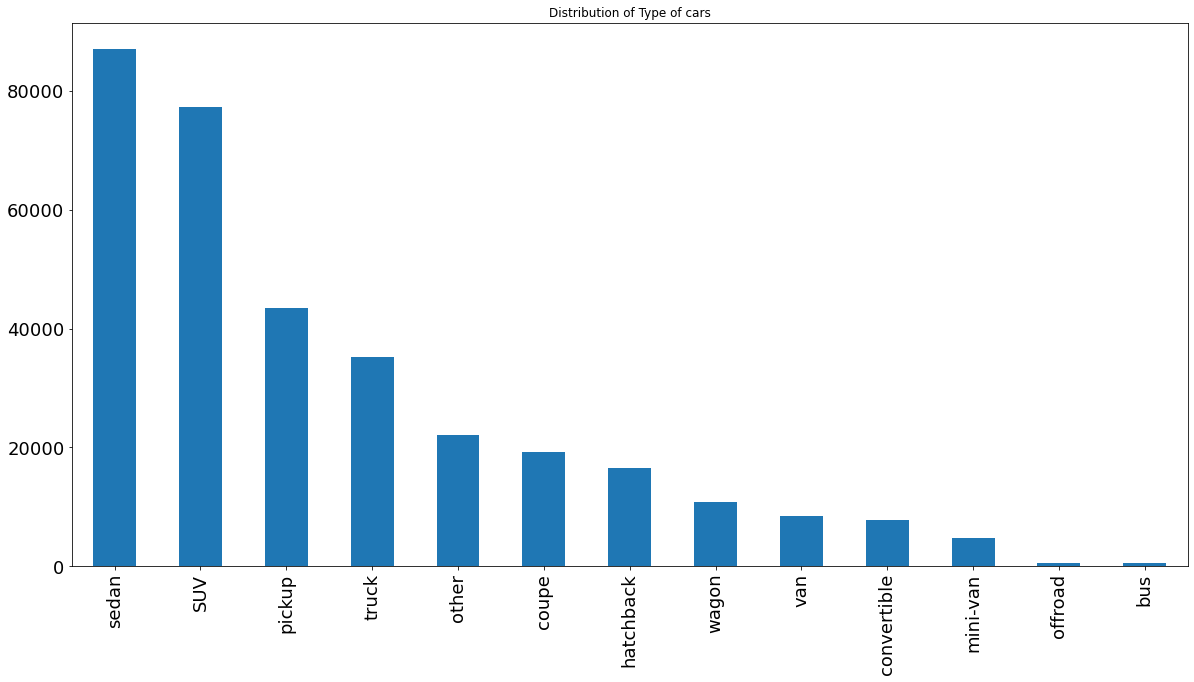

In [17]:
# Plotting the distribution of Types of cars. 

auto_copy['type'].value_counts().plot(kind='bar', figsize=(20,10), 
                                              fontsize=18, title='Distribution of Type of cars')

# Looks like "offroad, sedan and SUV" most frequently occured"

<AxesSubplot:title={'center':'Distribution of Transmission of cars'}>

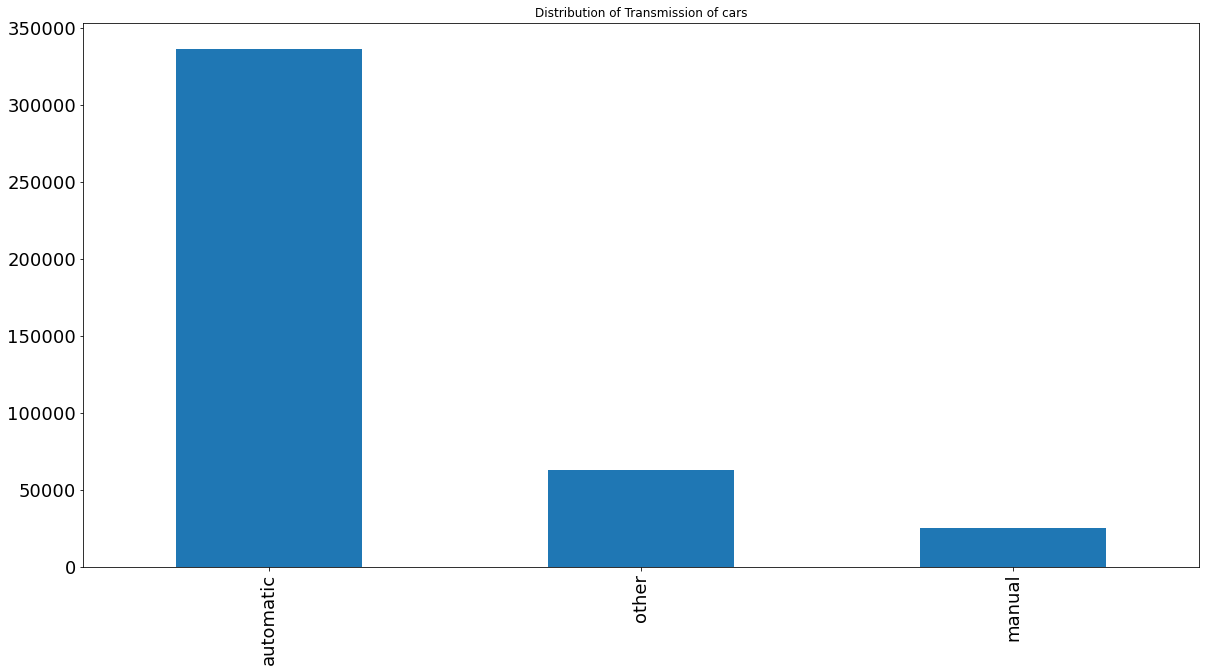

In [18]:
# Plotting the distribution of Transmission of cars. It will help me understand what kind of transmission sell most. 

auto_copy['transmission'].value_counts().plot(kind='bar', figsize=(20,10), 
                                              fontsize=18, title='Distribution of Transmission of cars')

# Looks like "automatic" most frequently occured"

#### Understanding of data 

The data have 17 features/columns comprises of the data types object, int64, and float. Our goal is to construct the model using the features to predict the column "price". We will have to understand the driver of the column price from the remaining features. The data contains the numeric and categorical columns. 

In [19]:
# adding another column named "age" to get the age of the car. ideally, older the car, cheaper it would be. 
auto_copy['age'] = 2022.0 - auto_copy['year']
auto_copy.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy,3.0
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy,2.0
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy,2.0
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy,4.0
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy,3.0


Count of the missing values in the data 
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
age               1205
dtype: int64


<AxesSubplot:>

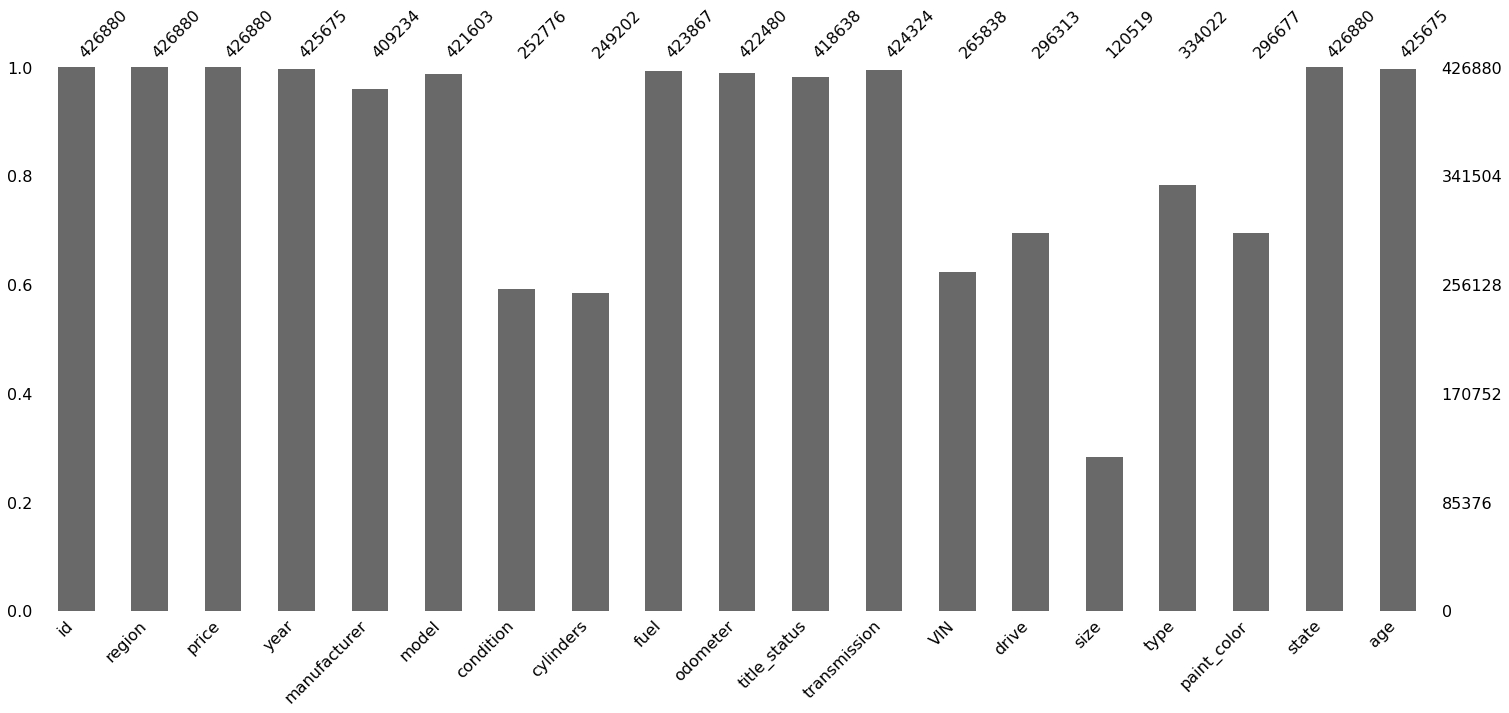

In [20]:
print('Count of the missing values in the data \n', auto_copy.isna().sum())
msno.bar(auto_copy) # I had to install msno before using it here. pip install msno

<b> The plot and counts above yield that huge data is missing in the features - condition, cylinders, VIN, drive, size, paint_color, and type. In the subsequent steps, we will have to fill in the missing value.</b>

In [21]:
auto_copy.corr()

,id,price,year,odometer,age
id,1.000000,-0.002779,-0.059040,0.010721,0.059040
price,-0.002779,1.000000,-0.004925,0.010032,0.004925
year,-0.059040,-0.004925,1.000000,-0.157215,-1.000000
odometer,0.010721,0.010032,-0.157215,1.000000,0.157215
age,0.059040,0.004925,-1.000000,0.157215,1.000000


<b> As evident, the correlation matrix doesn't yeild noteworthy. We will have to clean the data before recheck the corr after cleaning the data. </b>

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [22]:
# lets seperate the features based off data type

numeric_features = auto_copy.select_dtypes('number').columns.drop(['id', 'price'])
categorical_features = auto_copy.select_dtypes('object').columns.drop(['VIN', 'state'])
other_features = auto_copy[['VIN', 'id', 'state']].columns # we will plan to drop these two columns in the subsequent steps. 

print('numeric feature  ----- \n', numeric_features)
print('\n categorical feature  ----- \n', categorical_features)
print('\n other features  ----- \n',other_features)

numeric feature  ----- 
 Index(['year', 'odometer', 'age'], dtype='object')

 categorical feature  ----- 
 Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

 other features  ----- 
 Index(['VIN', 'id', 'state'], dtype='object')


### Preprocessing of categorical column

Let's start by preprocessing the categorical columns. 

In [23]:
# to consicely see the distribution counts of categorical columns
print( auto_copy['condition'].value_counts())
print('\n ************ \n')
print(auto_copy['fuel'].value_counts())
print('\n ************ \n')
print(auto_copy['title_status'].value_counts())
print('\n ************ \n')
print(auto_copy['drive'].value_counts())

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

 ************ 

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

 ************ 

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

 ************ 

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64


#### Fill in the missing value of the numeric features

We are going to use SimpleImpute to fill out the missing values. 

In [24]:
# Preprocess numeric features 

# Step1 
auto_numeric = auto_copy[numeric_features] # prepare the subset of dataframe with only numeric columns
# Step 2
impute = SimpleImputer(strategy="median") # Instantiate the Simple Imputer with "median"
#step 3
auto_numeric_impute = impute.fit_transform(auto_numeric) # Fit Transform the subset of dataframe prepared in step 1
# step 4
auto_copy[numeric_features] = auto_numeric_impute # Update the numeric features of Toy data (auto_copy) with the Impute output

In [25]:
#checking the number of missing value post Imputing 
auto_copy.isna().sum()[numeric_features]

year        0
odometer    0
age         0
dtype: int64

#### Fill in the missing value of the categorical features

Filling in the missing values in the categorical data will be tricky as I need a transformer that can treat the non-numeric columns. To fill in the missing values, I will first transform the column to the numeric (maybe using OneHot encoding, LabelEncoder, OrdinalEncoder), then apply Imputing on the features. 

In [26]:
auto_copy.isna().sum()[categorical_features]

region               0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

The transformation of the non-numeric column will fail with the error if you have empty/missing value. Therefore, during the transformation we will only keep the non-empty data. 

In [27]:
# Create a function to convert the features to numeric columns. 
check_imputer=auto_copy.copy()
check_imputer=check_imputer.drop(columns=['id'])

#object of LabelEncoder
encoder=LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data


In [28]:
data_cat=auto_copy[categorical_features]
encoder=LabelEncoder()

#create a for loop to iterate through each column in the data to fill in the null value
for columns in categorical_features:
    encode(data_cat[columns])
    imputer = IterativeImputer()
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
auto_copy[categorical_features]=data_cat  

In [29]:
# create another copy of the data to apply the encoding

auto_copy_preprocessed = auto_copy.drop(columns=other_features)
auto_copy_preprocessed.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,prescott,6000,2013.0,infiniti,g series,fair,5 cylinders,gas,85548.0,clean,automatic,4wd,full-size,offroad,grey,9.0
1,fayetteville,11900,2013.0,infiniti,g series,fair,5 cylinders,gas,85548.0,clean,automatic,4wd,full-size,offroad,grey,9.0


In [30]:
# Create a loop to iterate through each column in the data to apply Label Encoding aka changing it to numeric datatype

for i in range(len(categorical_features)):
    encode(auto_copy_preprocessed[categorical_features[i]])

In [31]:
# all the features are converted to the numeric and null are replaced with the algorithm. 
auto_copy_preprocessed.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,277,6000,2013.0,18,16738,1,4,2,85548.0,0,0,0,1,6,5,9.0
1,105,11900,2013.0,18,16738,1,4,2,85548.0,0,0,0,1,6,5,9.0
2,111,21000,2013.0,18,16738,1,4,2,85548.0,0,0,0,1,6,5,9.0
3,396,1500,2013.0,18,16738,1,4,2,85548.0,0,0,0,1,6,5,9.0
4,131,4900,2013.0,18,16738,1,4,2,85548.0,0,0,0,1,6,5,9.0


In [32]:
## Calculating correlation after transforming the data
auto_copy_preprocessed.corr()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
region,1.000000,-0.001412,-0.003604,0.001494,0.000215,-0.010965,-0.006795,-0.004425,-0.001244,-0.007796,-0.015237,0.012725,-0.006994,0.003554,-0.000149,0.003604
price,-0.001412,1.000000,-0.004926,0.002516,-0.000625,-0.001064,0.002443,-0.000836,0.010035,-0.000870,-0.000684,-0.002752,0.001110,0.000148,-0.000022,0.004926
year,-0.003604,-0.004926,1.000000,0.030067,0.053669,0.055063,-0.131864,0.090488,-0.156774,-0.020892,0.126389,-0.122606,-0.026336,0.020349,0.013028,-1.000000
manufacturer,0.001494,0.002516,0.030067,1.000000,-0.022137,-0.020637,-0.145027,-0.023986,0.001079,0.014235,0.001612,-0.049140,0.005852,0.043559,0.007087,-0.030067
model,0.000215,-0.000625,0.053669,-0.022137,1.000000,0.007607,0.049330,0.072290,-0.008011,-0.010537,0.011948,-0.095739,0.000932,-0.098624,0.011102,-0.053669
condition,-0.010965,-0.001064,0.055063,-0.020637,0.007607,1.000000,0.057547,0.131658,-0.033387,0.009626,0.337125,0.051423,-0.017365,0.043240,0.003569,-0.055063
cylinders,-0.006795,0.002443,-0.131864,-0.145027,0.049330,0.057547,1.000000,-0.096131,0.026160,-0.033212,0.037850,0.036665,0.010368,0.030744,0.032928,0.131864
fuel,-0.004425,-0.000836,0.090488,-0.023986,0.072290,0.131658,-0.096131,1.000000,-0.067363,-0.009699,0.260694,0.031878,-0.015137,-0.076626,-0.045042,-0.090488
odometer,-0.001244,0.010035,-0.156774,0.001079,-0.008011,-0.033387,0.026160,-0.067363,1.000000,0.010062,-0.099753,-0.011849,0.011517,0.004529,0.002706,0.156774
title_status,-0.007796,-0.000870,-0.020892,0.014235,-0.010537,0.009626,-0.033212,-0.009699,0.010062,1.000000,-0.051961,0.007529,0.012548,-0.003706,-0.008342,0.020892


<AxesSubplot:>

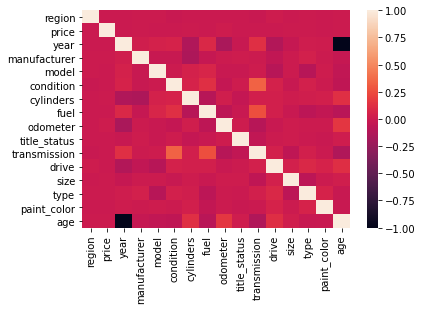

In [33]:
# heatmap of correlation matrix
corr = auto_copy_preprocessed.corr()

sns.heatmap(corr)

In [34]:
auto_copy_preprocessed.describe()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
count,426880.000000,4.268800e+05,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,4.268800e+05,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000
mean,193.978062,7.519903e+04,2011.240173,18.771158,16738.774271,1.160851,4.367288,2.011254,9.791454e+04,0.121486,0.352516,0.523100,1.050319,6.060471,5.459649,10.759827
std,117.573061,1.218228e+07,9.439234,11.439136,7798.144093,0.863034,1.017483,0.765235,2.127801e+05,0.705323,0.722444,0.724835,0.391878,3.525649,3.456513,9.439234
min,0.000000,0.000000e+00,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,5.900000e+03,2008.000000,10.000000,11171.000000,1.000000,4.000000,2.000000,3.813000e+04,0.000000,0.000000,0.000000,1.000000,4.000000,3.000000,5.000000
50%,197.000000,1.395000e+04,2013.000000,16.000000,16738.000000,1.000000,4.000000,2.000000,8.554800e+04,0.000000,0.000000,0.000000,1.000000,6.000000,5.000000,9.000000
75%,290.000000,2.648575e+04,2017.000000,28.000000,23649.000000,2.000000,5.000000,2.000000,1.330000e+05,0.000000,0.000000,1.000000,1.000000,9.000000,9.000000,14.000000
max,403.000000,3.736929e+09,2022.000000,41.000000,29648.000000,5.000000,7.000000,4.000000,1.000000e+07,5.000000,2.000000,2.000000,3.000000,12.000000,11.000000,122.000000


#### Normalization

<b> The data is unequally distributed with different scale of min and max. It will be a good idea to Normalize the data before modeling it. We will use MixMaxScaler to normalize the data. </b>

In [35]:
# We will split the data into training and test dataset for futrther analysis. 
X = auto_copy_preprocessed[['region', 'year','manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'age']]

y = auto_copy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Scaled data. This is a independent test to see how the scaler works. 
#The real scaling on the data is plugged into the pipeline in the modeling section.

scaler = MinMaxScaler()
auto_scaled_train = scaler.fit_transform(X_train) 
pd.DataFrame(auto_scaled_train, columns=X.columns)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,0.942928,0.975410,0.756098,0.911756,0.0,0.857143,0.0,0.003107,0.0,0.0,0.0,0.333333,0.833333,0.454545,0.024590
1,0.799007,0.901639,0.439024,0.464631,0.0,0.571429,0.5,0.013853,0.0,0.0,0.0,0.333333,1.000000,0.909091,0.098361
2,0.585608,0.942623,0.487805,0.726834,0.2,0.428571,0.5,0.008982,0.0,0.0,0.0,0.333333,0.000000,0.454545,0.057377
3,0.158809,0.926230,0.682927,0.718705,0.2,0.428571,0.5,0.007025,0.0,0.0,0.0,0.333333,0.333333,0.727273,0.073770
4,0.481390,0.959016,0.390244,0.599798,0.2,0.571429,0.5,0.002322,0.0,1.0,0.0,0.333333,0.500000,0.636364,0.040984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298811,0.009926,0.926230,0.975610,0.623512,0.4,0.571429,0.5,0.013920,0.0,0.5,0.5,0.666667,0.750000,0.818182,0.073770
298812,0.044665,0.401639,0.341463,0.720796,0.2,0.571429,0.5,0.002740,0.0,0.0,0.0,0.333333,0.500000,0.454545,0.598361
298813,0.081886,0.934426,0.317073,0.515163,0.0,0.714286,0.5,0.018415,0.0,1.0,0.0,0.333333,0.833333,0.454545,0.065574
298814,0.861042,0.934426,0.317073,0.560634,0.2,0.428571,0.5,0.011109,0.0,0.0,0.5,0.666667,0.750000,0.818182,0.065574


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [37]:
# Create the pipeline to scale and model at the same time

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [38]:
from sklearn.model_selection import cross_validate

with_categorical_scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
categorical_score = pd.DataFrame(with_categorical_scores)
categorical_score

,fit_time,score_time,test_score,train_score
0,0.193707,0.018277,-0.002420,0.000521
1,0.130610,0.014524,-0.131379,0.000497
2,0.129701,0.013998,0.000820,0.000091
3,0.129934,0.014484,0.000007,0.000581
4,0.129585,0.014120,-0.000098,0.000830


## Linear Regression w/o Scaling

In [39]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
y_pred

array([  49726.80757801,   59035.95383878, -100595.73350087, ...,
        -89786.22905014,  -62255.81732686,   11627.5901422 ])

In [40]:
print('coefficent', linear_model.coef_)
print('\n Mean Squared Error / MSE: ', mean_squared_error(y_pred, y_test))

coefficent [-4.96758462e+01 -3.15549152e+03  2.30942700e+03 -2.16138686e+00
  4.32881675e+03  1.48761601e+03 -3.56138195e+03  8.55957438e-01
 -1.47241733e+04  4.40623087e+04 -3.81355816e+04  5.91817741e+04
 -9.81303200e+02 -2.27759616e+03  3.15549152e+03]

 Mean Squared Error / MSE:  261026904664502.38


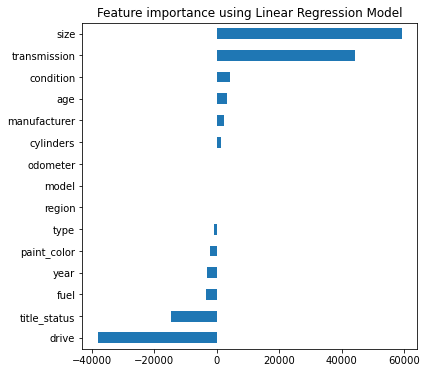

In [41]:
#Ploting feature importance graph

coef = pd.Series(linear_model.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

### Linear Regression w/ Scaling

In [42]:
# Create the pipeline to scale and model at the same time

pipe_scaled = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
pipe_scaled.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [43]:
y_pred_linear = pipe_scaled.predict(X_test)

In [44]:
pipe_scaled.named_steps["model"].coef_

array([ -5841.90568629, -29906.56808788,  26413.44520884, -16845.74801112,
         3730.92886786,   1513.7172615 ,  -2723.59902838, 176573.92074713,
       -10366.49072416,  31789.28690983, -27618.85089555,  23240.00334138,
        -3459.5614021 ,  -7873.04664049,  29906.56808788])

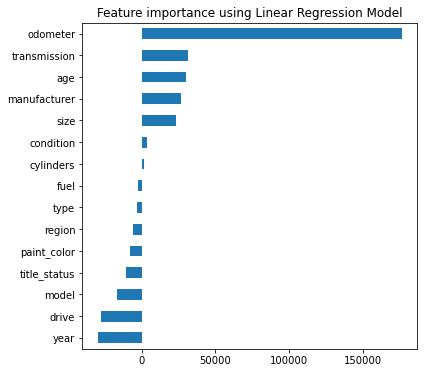

In [45]:
#Ploting feature importance graph

coef = pd.Series(pipe_scaled.named_steps["model"].coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

## Ridge Regression w/o Scaling

In [46]:
ridge_model = Ridge(alpha=20.336,solver='auto')
ridge_model.fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
y_pred

array([  49712.58746898,   59042.71654761, -100581.35030996, ...,
        -89775.40990914,  -62253.14262347,   11628.80357417])

In [47]:
from numpy import absolute, mean, std
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ridge_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 222404.321 (128727.096)


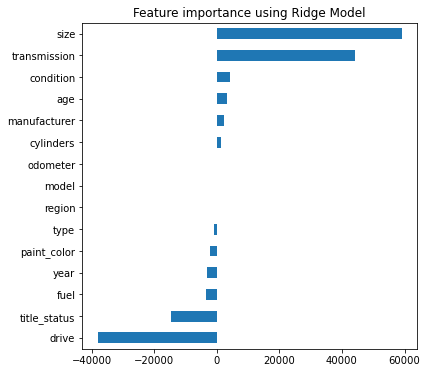

In [48]:
#Visualization of Feature Importance

coef = pd.Series(ridge_model.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

## Ridge Regression w/ Scaling

In [49]:
# Create the pipeline to scale and model at the same time

pipe_scaled_ridge = Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=20.336,solver='auto'))])
pipe_scaled_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=20.336))])

In [50]:
y_pred_ridge = pipe_scaled_ridge.predict(X_test)

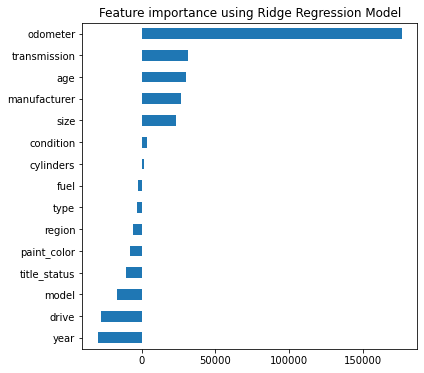

In [51]:
#Ploting feature importance graph

coef = pd.Series(pipe_scaled_ridge.named_steps["model"].coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Regression Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

## Lasso Regression w/ Scaling

In [52]:
# Create the pipeline to scale and model at the same time

pipe_scaled_lasso = Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.0001))])
pipe_scaled_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.0001))])

In [53]:
y_train

164004    46999
189131     8995
394301        0
74720      9995
19380     23839
          ...  
259178     6800
365838    36000
131932    18995
146867      269
121958    28995
Name: price, Length: 298816, dtype: int64

In [54]:
y_pred_lasso = pipe_scaled_lasso.predict(X_test)
y_pred_lasso

array([  49726.80722685,   59035.95360703, -100595.73346197, ...,
        -89786.2285586 ,  -62255.81739652,   11627.58972727])

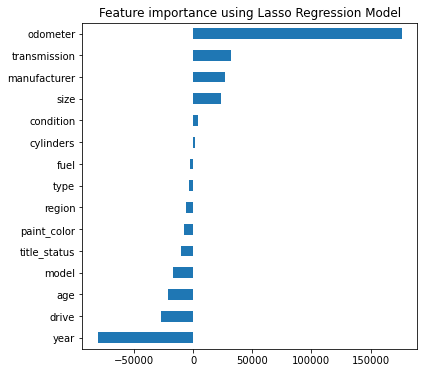

In [55]:
#Ploting feature importance graph

coef = pd.Series(pipe_scaled_lasso.named_steps["model"].coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Regression Model")
plt.savefig('Lassp-Regression-Feature-Importance.jpg')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### We will calculate Mean Squared Error, RMSE, and Mean Absolute Error to find the accuracy of each model we built earlier.

In [56]:
mse_lasso = mean_squared_error(y_pred_lasso, y_test)
mae_lasso = mean_absolute_error(y_pred_lasso, y_test)
rmse_lasso = np.sqrt(mse_lasso)

print('Lasso Regression Loss Functions:\n\nMSE: {} \nMAE: {} \nRMSE: {}'.format(mse_lasso, mae_lasso, rmse_lasso))

Lasso Regression Loss Functions:

MSE: 261026904664461.1 
MAE: 179502.65933532573 
RMSE: 16156327.078406809


In [57]:
mse_ridge = mean_squared_error(y_pred_ridge, y_test)
mae_ridge = mean_absolute_error(y_pred_ridge, y_test)
rmse_lasso = np.sqrt(mse_ridge)

print('Ridge Regression Loss Functions:\n\nMSE: {} \nMAE: {} \nRMSE: {} '.format(mse_ridge, mae_ridge, rmse_lasso))

Ridge Regression Loss Functions:

MSE: 261026898650724.66 
MAE: 179498.73950970566 
RMSE: 16156326.89229593 


In [58]:
mse_linear = mean_squared_error(y_pred_linear, y_test)
mae_linear = mean_absolute_error(y_pred_linear, y_test)
rmse_linear = np.sqrt(mse_linear)

print('Linear Regression Loss Functions:\n\nMSE: {} \nMAE: {} \nRMSE: {}'.format(mse_linear, mae_linear, rmse_linear))

Linear Regression Loss Functions:

MSE: 261026904664502.3 
MAE: 179502.6594189809 
RMSE: 16156327.078408085


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

After the model, we are to analyze the coefficient of the features considered by the model. Think of the coefficient as the way the model tells which features/columns are to be given importance during prediction. The features coefficient will help the dealer to understand what factors are essential for the used cars. 
***Based on the plot, the odometer, manufacturer, transmission, age, and size are the most critical features that constitute the price of the used cars.*** 

Loss functions help understand the accuracy of the model and how far off is the prediction of the model given the test data. Looking at the MSE, MAE, and RMSE of the scaled models, the loss functions seem related. 

**Next steps and consideration** 
* Reading a couple of online articles about other models, the KNN model can help better predict such a scenario than any other model. So, it will be worth looking at the KNN model's loss function. 
* The dependent/target column price is not scaled. After scaling the price column, we should reconstruct the model and calculate the Loss functions. 
* We should consider plotting the distribution plot of the raw data using the distplot library. 
* In the current process, we ran the combination of models separately. Using the Gridsearch & Makepipe Sklearn libraries, we should reduce the number of lines in the code. 

<b><i>References</b></i>

* https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ (Normalization & Standarization)
* https://www.analyticsvidhya.com/blog/2021/05/understanding-column-transformer-and-machine-learning-pipelines/ (Column Transformer)
* https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/ (Imputation)

Other references that can be used for the future consideration

In [59]:
# # we will use Column Transformer for the columns - condition, title and fuel
# #Inspired from the article - https://bait509-ubc.github.io/BAIT509/lectures/lecture5.html


# #condition and title ordering to be used in OrdinalEncoder
# rating_order_cond = ['salvage', 'fair', 'good', 'like new', 'excellent', 'new'] 
# rating_order_title = ['salvage', 'missing', 'parts only', 'rebuilt', 'lien', 'clean']
                                          
# categorical_transformer = Pipeline(steps=[("ordinal", OrdinalEncoder(categories='rating_order_cond')), 
#                                          ("ordinal1", OrdinalEncoder(categories='rating_order_title')),
#                                          ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore"))])                                       

# col_transformer = ColumnTransformer(transformers=[("categorical", categorical_transformer, categorical_features)], 
#                                     remainder='passthrough')

# #col_transformer.fit(auto_copy)


In [60]:
# numeric_transformer = Pipeline(
#     steps=[("imputer", SimpleImputer(strategy="median")), 
#            ("scaler", StandardScaler())]
# )

# categorical_transformer = Pipeline(
#     steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing"))]
# )



In [61]:
# col_transformer = ColumnTransformer(
#     transformers=[
#         ("numeric", numeric_transformer, numeric_features[1]),
#         ("categorical", categorical_transformer, categorical_features)
#     ],
#     remainder='passthrough'
# )

# col_transformer = ColumnTransformer(
#     transformers=[
#         ("numeric", numeric_transformer, numeric_features)
#     ],
#     remainder='passthrough'
# )

# Display Pipeline
# from sklearn import set_config
# set_config(display='diagram')
